In [6]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from lz import * 
import lz 

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [7]:
model='/mnt/nfs1703/test/prj/few-shot/models/res101.img10k.longtail.flatten2/snapshots/iter.latest.parrots'  
f=h5py.File(model)

In [8]:
a=f.keys()

In [9]:
raw=f['luzai.cls.w@value'][...]

In [10]:
raw.shape


(10000, 18432)

In [11]:
f.close()

In [37]:
raw.shape

# pickle(raw,'lst_fc.pkl')
# np.savetxt('lst_fc',raw,delimiter='/t')

(10000, 18432)

In [15]:
a,b,c=np.linalg.svd(raw)

In [16]:
a.shape,b.shape,c.shape

((10000, 10000), (10000,), (18432, 18432))

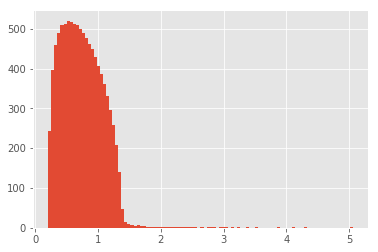

In [18]:
_=plt.hist(b,bins=100)

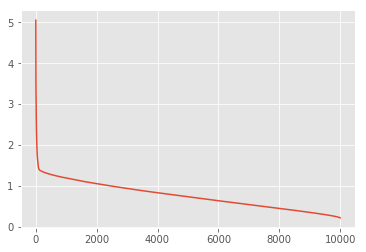

In [22]:
plt.plot(np.sort(b)[::-1])

In [30]:
import sklearn 


In [32]:
from sklearn import decomposition
from sklearn import datasets

In [35]:
pca=decomposition.PCA(n_components=6000)
pca.fit(raw)
rawp=pca.transform(raw)

PCA(copy=True, iterated_power='auto', n_components=6000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
np.savetxt('lst_fc',rawp,delimiter='/t')

In [41]:
import bhtsne

In [12]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [13]:
tsne = TSNE(n_jobs=32)
Y = tsne.fit_transform(raw)
Y.shape

(10000, 2)

In [14]:
tsne=TNSE(n_jobs=32,n_components=3)
Y2=tsne.fit_transform(raw)

NameError: name 'TNSE' is not defined

In [ ]:
Y2.shape

In [143]:
from struct import calcsize, pack, unpack
for no_dims in [2,3]:
    for perplexity in [5,35,50,65,100]: 
        sample_count=10000
        sample_dim=6000
        theta=0.5
        max_iter=1000

        workdir='p.{}.dim.{}/'.format(perplexity,no_dims) 
        lz.mkdir_p(workdir)
        with open( (workdir+'data.dat'), 'wb') as data_file:
            # Write the bh_tsne header
            data_file.write(pack('iiddii', sample_count, sample_dim, theta, perplexity, no_dims, max_iter))
            # Then write the data
            for sample in samples:
                data_file.write(pack('{}d'.format(len(sample)), *sample))
    

In [151]:
def _read_unpack(fmt, fh):
    return unpack(fmt, fh.read(calcsize(fmt)))

def get_res(path):
         
        with open(osp.join(path,'result.dat'), 'rb') as output_file:
        # The first two integers are just the number of samples and the
        #   dimensionality
            result_samples, result_dims = _read_unpack('ii', output_file)
            # Collect the results, but they may be out of order
            results = [_read_unpack('{}d'.format(result_dims), output_file)
                for _ in range(result_samples)]
            # Now collect the landmark data so that we can return the data in
            #   the order it arrived
            results = [(_read_unpack('i', output_file), e) for e in results]
            # Put the results in order and yield it
            results.sort() 
            for _, result in results:
                yield result


In [153]:
def convert(res_in):
    res=[]
    for result in res_in:
        sample_res = []
        for r in result:
            sample_res.append(r)
        res.append(sample_res)
    return np.array(res) 


In [156]:
res=get_res('p.50.dim.3')            
res=convert(res)        
np.array(res).shape
res3=res
res=get_res('p.50.dim.2')            
res=convert(res)        
np.array(res).shape
res2=res

(10000, 3)

(10000, 2)

In [169]:
res3-=np.min(res3,axis=0) 
res3 /= np.max(res3,axis=0) 


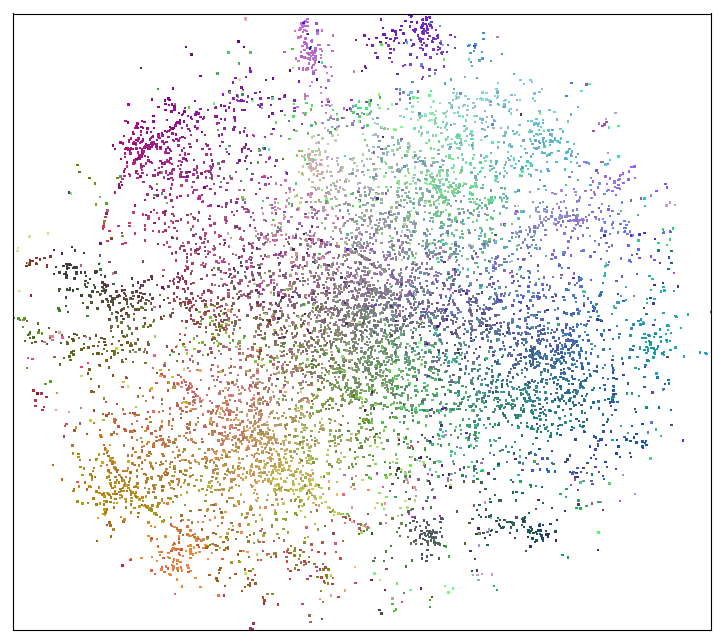

In [171]:
matplotlib.style.use('default')

def plot_tsne(xy, colors=None, alpha=1, figsize=(9,8), s=3, cmap= plt.cm.get_cmap('RdYlBu')):
    plt.figure(figsize=figsize, facecolor='white',edgecolor='white' )
    plt.margins(0)
#     plt.axis('off')
    if colors.shape[-1] ==3:
        fig = plt.scatter(xy[:,0], xy[:,1],
                            c=colors, # set colors of markers
                            cmap=cmap, # set color map of markers
                            alpha=alpha, # set alpha of markers
                            marker='s', # use smallest available marker (square)
                            s=s, # set marker size. single pixel is 0.5 on retina, 1.0 otherwise
                            lw=0, # don't use edges
                            edgecolor='') # don't use edges
        # remove all axes and whitespace / borders
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    #     plt.show()
        return 
    if colors is not None:
        fig = plt.scatter(xy[:,0], xy[:,1],
                          vmin=colors.min()  ,
                          vmax=colors.max() ,
                            c=colors, # set colors of markers
                            cmap=cmap, # set color map of markers
                            alpha=alpha, # set alpha of markers
                            marker='s', # use smallest available marker (square)
                            s=s, # set marker size. single pixel is 0.5 on retina, 1.0 otherwise
                            lw=0, # don't use edges
                            edgecolor='') # don't use edges
        # remove all axes and whitespace / borders
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    #     plt.show()
        plt.colorbar(fig)
        return 
    if colors is None: 
        fig = plt.scatter(xy[:,0], xy[:,1],
                            c=colors, # set colors of markers
                            cmap=cmap, # set color map of markers
                            alpha=alpha, # set alpha of markers
                            marker='s', # use smallest available marker (square)
                            s=s, # set marker size. single pixel is 0.5 on retina, 1.0 otherwise
                            lw=0, # don't use edges
                            edgecolor='') # don't use edges
        # remove all axes and whitespace / borders
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        return 
    
plot_tsne(res2,colors=res3)

In [129]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 1000))
cls=[]
for ind in np.loadtxt('10k.csv'):
    ind=int(ind) 
    cls.append(ind)

In [130]:
cls.append(1000)

In [131]:
cls=np.array(cls).astype(float) 
cls = cls 

In [161]:
cls.shape

(10000,)

In [57]:
mkdir_p('log/',delete=True)

Are you sure to rm log/


In [58]:
embedding_var = tf.Variable(raw,name='lst_fc')

from tensorflow.contrib.tensorboard.plugins import projector

with tf.Session() as sess:
    # Create summary writer.
    writer = tf.summary.FileWriter('./log', sess.graph)
    # Initialize embedding_var
    sess.run(embedding_var.initializer)
    # Create Projector config
    config = projector.ProjectorConfig()
    # Add embedding visualizer
    embedding = config.embeddings.add()
    # Attache the name 'embedding'
    embedding.tensor_name = embedding_var.name
    # Metafile which is described later
    embedding.metadata_path = './10k.csv'
    # Add writer and config to Projector
    projector.visualize_embeddings(writer, config)
    # Save the model
    saver_embed = tf.train.Saver([embedding_var])
    saver_embed.save(sess, './log/embedding_test.ckpt', 1)

writer.close()

'./log/embedding_test.ckpt-1'

In [28]:
fn='/home/wangxinglu/prj/few-shot/data/imglst/img10k.test.twolevel'
a=np.loadtxt(fn,dtype=str)
a=a[:,1:]
a=a.astype(float)

In [1]:
b=np.unique(a,axis=0).astype(int)

NameError: name 'np' is not defined

In [53]:
np.savetxt('10k.csv',b[:,-1].astype(int),fmt='%d')

In [50]:
!wc -l ./10k.csv

9999 ./10k.csv
